In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,
32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
# Compile and train the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.history

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5097 - accuracy: 0.4489 - val_loss: 1.2373 - val_accuracy: 0.5590
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1394 - accuracy: 0.5953 - val_loss: 1.0516 - val_accuracy: 0.6277
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9863 - accuracy: 0.6533 - val_loss: 0.9543 - val_accuracy: 0.6636
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8829 - accuracy: 0.6907 - val_loss: 0.9213 - val_accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8009 - accuracy: 0.7191 - val_loss: 0.9132 - val_accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7364 - accuracy: 0.7402 - val_loss: 0.8992 - val_accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6832 - accuracy: 0.7592 - val_loss: 0.8551 -

{'loss': [1.5097376108169556,
  1.1393946409225464,
  0.9862830638885498,
  0.8828921318054199,
  0.8009233474731445,
  0.7363927960395813,
  0.6832265853881836,
  0.6382601857185364,
  0.5908991098403931,
  0.5535069108009338],
 'accuracy': [0.4489400088787079,
  0.5953199863433838,
  0.6532800197601318,
  0.6906599998474121,
  0.7190799713134766,
  0.7402200102806091,
  0.7591999769210815,
  0.7731800079345703,
  0.7918800115585327,
  0.803820013999939],
 'val_loss': [1.2373347282409668,
  1.0515738725662231,
  0.954262375831604,
  0.9213417172431946,
  0.9131504893302917,
  0.8991593718528748,
  0.8550686240196228,
  0.8922561407089233,
  0.8717420697212219,
  0.9021178483963013],
 'val_accuracy': [0.5590000152587891,
  0.6276999711990356,
  0.6636000275611877,
  0.6844000220298767,
  0.6858999729156494,
  0.6933000087738037,
  0.703000009059906,
  0.699999988079071,
  0.7117999792098999,
  0.7031000256538391]}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Choose a random image from the test dataset
i = np.random.randint(0, len(test_images))
img = test_images[i]

In [9]:
# Prepare the image to be used with the model
img_array = np.expand_dims(img, axis=0)


In [10]:
# Use the model to predict the image's class
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 3s 3s/step


In [11]:
# Define the CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
# Print the predicted and actual class of the image
print("Predicted class:", cifar10_classes[class_idx])
print("Actual class:", cifar10_classes[test_labels[i][0]])

Predicted class: bird
Actual class: cat


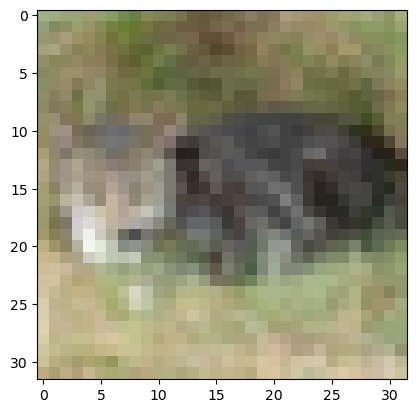

In [13]:
# Display the image
plt.imshow(img)
plt.show()